In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning algorithms
from sklearn.linear_model import Ridge  # Ridge regression
from sklearn.kernel_ridge import KernelRidge  # Kernel ridge regression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor  # AdaBoost & Random Forest
from sklearn.neural_network import MLPRegressor  # Neural network
from sklearn.svm import SVR  # Support vector machine

# Cross-validation
from sklearn.model_selection import GridSearchCV

class learning(object): 

    def __init__(self, alg, rule, file):        # alg = algorithm name, rule = evaluation rule
        self.alg = alg
        self.rule = rule
        self.file = file

    # Import dataset
    def loadDatasets(self):
        path = os.getcwd()#get current path
        path_up1Dir = os.path.dirname(path)#go up one directory
        dataset = pd.read_excel(path_up1Dir + self.file)#to import the preprocessed dataset into a variable

        X = dataset['MVPA'].values.reshape(-1, 1)
        y = dataset['aveTotalArea']
        other = pd.DataFrame(dataset.iloc[:,:4])
        
        return X, y, other, path_up1Dir

    # Which algorithm
    def algorithm(self):
        alg = self.alg
        
        if alg == 'ridge':
            model = Ridge()
        elif alg == 'kr':
            model = KernelRidge()
        elif alg == 'svr':
            model = SVR()
        elif alg == 'nn':
            model = MLPRegressor()
        elif alg == 'rf':
            model = RandomForestRegressor()
        elif alg == 'ab':
            model = AdaBoostRegressor()
        else:
            print("unvalid algorithm.")
            return 0
            
        return model
        
    # Set param_grid, aka the main parameters in dict
    def param_grid(self):
        alg = self.alg

        if alg == 'ridge':
            param_grid = [
                {'alpha':np.logspace(-6,6,13)},
                {'alpha':np.arange(1,1001,100)}
            ]

        elif alg == 'kr':
            param_grid = [
                {'kernel':['rbf'],
                 'gamma':np.logspace(-2,2,5),
                 'alpha':np.logspace(-6,6,13)
                },
                {'kernel':['linear'],
                 'alpha':np.logspace(-6,6,13)
                }
            ]

        elif alg == 'svr':
            param_grid = [
                {'kernel': ['linear'],
                 'C': np.logspace(0,3,4),
                 'coef0': np.linspace(0,5,10)
                 },
                {'kernel': ['rbf'],
                 'gamma': np.logspace(-10,1,20),
                 'C': np.logspace(0,3,4),
                 'coef0': np.linspace(0,5,10)
                 },
            ]

        elif alg == 'nn':
            # nhn_range = [1, 8, 10, 12, 14, 16, 18, 50]  # number of hidden neurons
            alpha = 10.0 ** -np.arange(1, 7)
            # for nhn in nhn_range:
            param_grid = {
                'alpha': alpha,
                'max_iter': [10000]
            }

        elif alg == 'rf':
            param_grid = {
                'n_estimators':np.arange(10,101,10), # 从10到100，每隔10取一个
                'max_features':np.arange(0.1,1.1,0.1), # 从0.1到1，每隔0.1取一个
                'max_depth':np.arange(1,11),
                #'min_samples_split':np.arange(2,10),
                'bootstrap':[True,False]
            }

        elif alg == 'ab':
            param_grid = {
                'n_estimators':np.arange(10,201,10), # 从10到200，每隔10取一个
                'learning_rate':np.arange(0.1,1.1,0.1) # 从0.1到1，每隔0.1取一个
            }

        else:
            print("unvalid algorithm.")
            return 0

        return param_grid

        
    # GridSearchCV to find optimal parameters
    def gridSearchCV_eval(self):
        X = self.loadDatasets()[0]
        if (self.alg == 'ridge' or self.alg == 'kr'):
            y = self.loadDatasets()[1]
        else:
            y = self.loadDatasets()[1].values.ravel()
        
        grid = GridSearchCV(estimator=self.algorithm(), # algorithm
                            param_grid=self.param_grid(), # specify the parameters to search over using a dict
                            cv=10, # 10-Fold
                            scoring=self.rule # model evaluation rule
                            )

        # Build the model, aka training the dataset
        grid.fit(X, y)
        
        # Output the best parameter, cross-validation score, estimator, and the index of best estimator.
        print("\n------------------ %s Model" %self.algorithm())
        print("Best score in %s: {:.2f}".format(grid.best_score_) %self.rule)
        
        #######################
        # Evaluation
        if (self.rule == 'r2'):
            yhat = grid.predict(X)
            sorted(y)
            plt.title("Scatter Plot: %s Model w/ y_true & y_pred" %self.algorithm())
            plt.scatter(x=y, y=yhat, alpha=0.25)
            plt.xlabel('Actual') 
            plt.ylabel('Predicted')
            plt.grid(True)
            plt.savefig(fname=self.loadDatasets()[3] + "/x_MVPA_y_totalArea/scatter_%s_y_true_VS_y_pred.png" %self.algorithm())
            plt.show()



------------------ Ridge() Model
Best score in neg_mean_absolute_error: -0.79

------------------ Ridge() Model
Best score in neg_mean_squared_error: -1.01

------------------ Ridge() Model
Best score in r2: -0.06


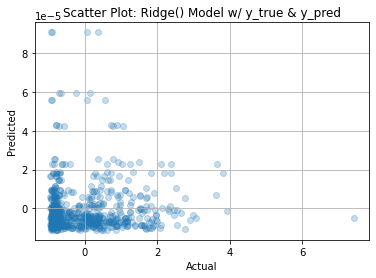


------------------ KernelRidge() Model
Best score in neg_mean_absolute_error: -0.79

------------------ KernelRidge() Model
Best score in neg_mean_squared_error: -1.00

------------------ KernelRidge() Model
Best score in r2: -0.04


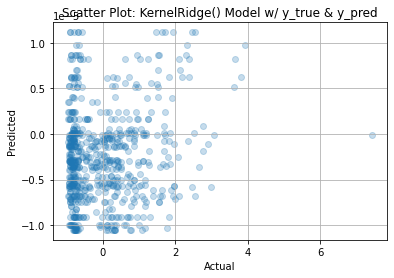


------------------ SVR() Model
Best score in neg_mean_absolute_error: -0.76

------------------ SVR() Model
Best score in neg_mean_squared_error: -1.12

------------------ SVR() Model
Best score in r2: -0.14


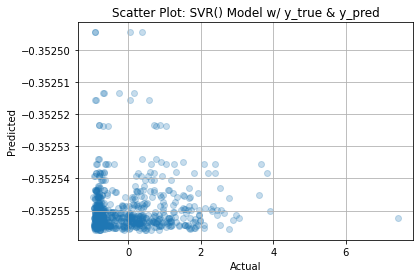


------------------ MLPRegressor() Model
Best score in neg_mean_absolute_error: -0.79

------------------ MLPRegressor() Model
Best score in neg_mean_squared_error: -1.00

------------------ MLPRegressor() Model
Best score in r2: -0.05


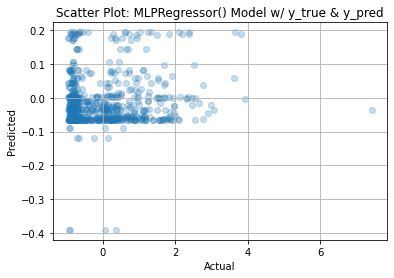


------------------ RandomForestRegressor() Model
Best score in neg_mean_absolute_error: -0.79

------------------ RandomForestRegressor() Model
Best score in neg_mean_squared_error: -1.01

------------------ RandomForestRegressor() Model
Best score in r2: -0.05


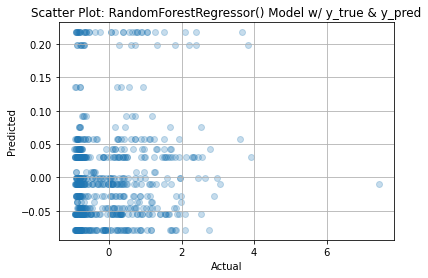


------------------ AdaBoostRegressor() Model
Best score in neg_mean_absolute_error: -0.80

------------------ AdaBoostRegressor() Model
Best score in neg_mean_squared_error: -1.01

------------------ AdaBoostRegressor() Model
Best score in r2: -0.06


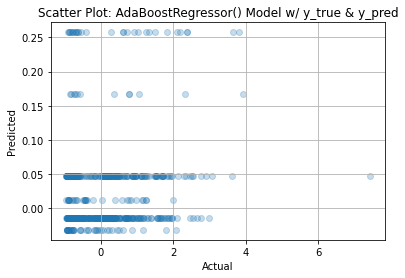

In [11]:
if __name__ == '__main__':
    models = ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab'] # ['ridge', 'kr', 'svr', 'nn', 'rf', 'ab']
    rules = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'] # ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'r2']

    for model in models:
        for rule in rules:
            test = learning(model, rule, '/y_MVPA/y_MVPA.xlsx')
            test.gridSearchCV_eval()